# Empowering Data Analysis through Visualization


## Approach


With the amount of data available at our fingertips, cyphering though it all requires a significant amount time.  At times this information is needed with the outmost importance to formulate a solution or complete a research.

By reviewing the original dataset, the team identified key elements that could assist in identifying the best possible results.  Each of this elements have different level of weight that contribute to the relevance of the results.  By identifying these metrics and their level of importance, data could be search with a weighted algorithm.  

### K-Means Clustering
By using unsupervised learning ML technique of K-Means clustering, provided us methods for creating predictors to increase accuracy of our model.  

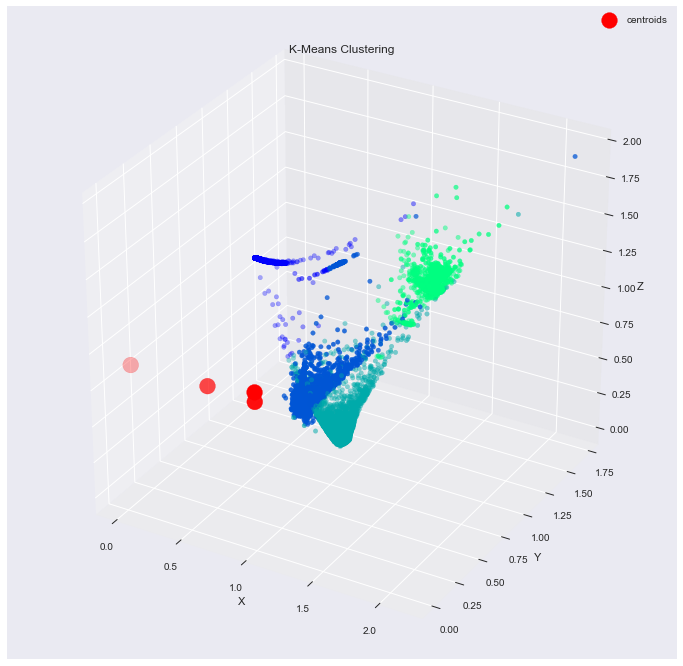  



### Pros
 - Empowers users to identify key elements and prioritize them for better result sets
 - Provides a refinement approach by using cluster centers for modeling the data
 
### Cons
 - The accuracy of the results is dependent on the quality of the intial dataset

 
 

## Data Visualization Tool


<screen capture of the tool>
    
<link to the tool>

## Import Dataset into SQL Server


In [ ]:
<link to script>

## Import JSON to SQL Server


In [ ]:
<link to script>

## SQL Schema

In [ ]:
<link to script>

##  PowerShell with C# EasyCsv to clean data and convert to correct types

In [ ]:
<link to script>

## K-Means Clustering

In [ ]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
import pandas as pd
import math
import seaborn as sns

In [ ]:
# Change data_dir to folder on your computer.
data_dir = "../data/"
filepath = data_dir+"paper_ranks.csv"
num_clusters = 9
text_columns = ['paper_id'] # 
numeric_columns = ['AuthorRank', 'JournalRank', 'Recency', 'CitedAuthorsRank', 'CitedInstitutionRank', \
                   'q01', 'q02', 'q03', 'q04', 'q05', 'q06', 'q07', 'q08', 'q09']
model_data = None
logical_cores = 4 # how many logical CPU cores you have

In [ ]:
# Functions
def normalize(df):
    """
    Normalize and Scale the numerical columns
    """
    data = df.copy().values   
    min_max_scaler = preprocessing.MinMaxScaler()
    scaled_data = min_max_scaler.fit_transform(data)
    return pd.DataFrame(columns=df.columns, data=scaled_data)

def plot_scree(percent_variance):
    """
    Create Scree Plot of Principal Components Variance
    """  
    # Visualize the variance explained for each observation by the principal components
    cols = []
    for i in range(len(percent_variance)):
        cols.append('PC'+str(i+1))

    sns.barplot(y=cols, x=percent_variance)
    plt.title('PCA Scree Plot - larger explains more variance')
    plt.show()

In [ ]:
# Import XDF Online Retail data set
df = pd.read_csv(filepath)
df = df.drop('q10', 1)
df = df.fillna(1)
df.head()

In [ ]:
df.describe()

In [ ]:
<table>

In [ ]:
model_df = df.copy().drop('paper_id', 1)
# Normalize data
model_df = normalize(model_df)
model_df.head()

In [ ]:
<table>

In [ ]:
# Use visual diagnostic to estimate optimal number of clusters
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(model_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title('Optimal #Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

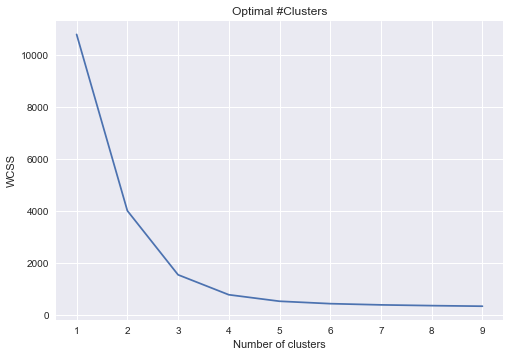

In [ ]:
num_clusters = 4

In [ ]:
km = KMeans(n_clusters=num_clusters, 
            random_state=123, 
            verbose=True, 
            n_jobs=logical_cores, 
            algorithm='full')

kmeans_data = km.fit_transform(model_df)
clusters = km.predict(model_df)
labels = km.labels_

In [ ]:
# Create dataframe for our PC variables.
k_columns = []
for i in range(len(kmeans_data[0])):
    k_columns.append('PC'+str(i+1))
    
kmeans_df = pd.DataFrame(columns=k_columns, data=kmeans_data)
kmeans_df.head()

In [ ]:
<table>

In [ ]:
#Plot the clusters obtained using k means
# https://thatascience.com/learn-machine-learning/kmeans/
fig = plt.figure(1, figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot Cluster Centroids
scatter = ax.scatter(km.cluster_centers_[:, 0], # get 1st N of each row
                     km.cluster_centers_[:, 1],
                     km.cluster_centers_[:, 2],
                     s = 250, 
                     marker='o', 
                     c='red', 
                     label='centroids')

# Plot Cluster X, Y, Z points
scatter = ax.scatter(kmeans_data[:, 0], 
                     kmeans_data[:, 1], 
                     kmeans_data[:, 2],
                     c=clusters, 
                     s=20, 
                     cmap='winter')

ax.set_title('K-Means Clustering')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

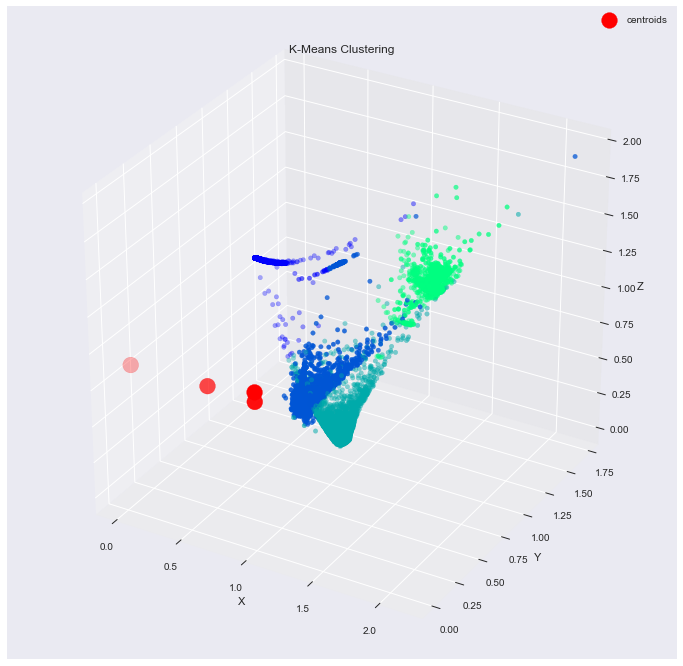

In [ ]:
 paper_id = df['paper_id'].values
data = list( zip(paper_id, clusters) )
labeld_df = pd.DataFrame(columns=['paper_id', 'cluster'], data=data)
df['ClusterLabel'] = clusters
labeld_df.head()

<table>

In [ ]:
labeld_df.to_csv(data_dir+"paper_kmeans_clusters.csv")

In [ ]:
 df.head()

<table>